In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import statsmodels.api as sm

In [2]:
np.random.seed(42) ## set for reproducibilty of the results.

In [3]:
json_data = '''[
{"app": "A", "bid_price": 0.01, "win": 0, "events": 100000}, 
{"app": "A", "bid_price": 0.01, "win": 1, "events": 0}, 
{"app": "A", "bid_price": 0.1, "win": 0, "events": 7000}, 
{"app": "A", "bid_price": 0.1, "win": 1, "events": 3000}, 
{"app": "A", "bid_price": 0.2, "win": 0, "events": 8000000}, 
{"app": "A", "bid_price": 0.2, "win": 1, "events": 2000000}, 
{"app": "A", "bid_price": 0.4, "win": 0, "events": 700000}, 
{"app": "A", "bid_price": 0.4, "win": 1, "events": 300000}, 
{"app": "A", "bid_price": 0.5, "win": 0, "events": 80000}, 
{"app": "A", "bid_price": 0.5, "win": 1, "events": 20000}, 
{"app": "A", "bid_price": 0.75, "win": 0, "events": 7000}, 
{"app": "A", "bid_price": 0.75, "win": 1, "events": 3000}, 
{"app": "A", "bid_price": 1, "win": 0, "events": 400}, 
{"app": "A", "bid_price": 1, "win": 1, "events": 600}, 
{"app": "A", "bid_price": 2, "win": 0, "events": 30}, 
{"app": "A", "bid_price": 2, "win": 1, "events": 70}, 
{"app": "A", "bid_price": 5, "win": 0, "events": 2}, 
{"app": "A", "bid_price": 5, "win": 1, "events": 8}, 
{"app": "A", "bid_price": 9, "win": 0, "events": 0}, 
{"app": "A", "bid_price": 9, "win": 1, "events": 1}
]'''

df = pd.read_json(json_data, orient ='records')
df

,app,bid_price,win,events
0,A,0.01,0,100000
1,A,0.01,1,0
2,A,0.10,0,7000
3,A,0.10,1,3000
4,A,0.20,0,8000000
5,A,0.20,1,2000000
6,A,0.40,0,700000
7,A,0.40,1,300000
8,A,0.50,0,80000
9,A,0.50,1,20000


## Task 1

#### Based on Table in above Scenario, estimate the expected win rate for a bid repsonse at a given price (prices are listed in table). State your assumptions clearly and provide the steps on how you arrived at your answer.


##### From the above json data we have the response data with bid price and win variable indicating we won the  auction or not. Number of times a particular response with a given outcome was observed is indicated by events.

#### We observe that for every bid price, there is a win or loose of auction with the number of times it has been observed. So derived a new column depicting the total events(win + loose) for that bid price. Computed the likelihood of the events occuring for every bid price.

#### For Eg: The outcome probability for bid price 0.10, indicates that there is 70% of events lost in the auction for that same but and only 30% of events won. Showcase the likelihood of the events that won and lost for every bid price.


In [4]:
grouped_data = df.groupby(['bid_price'])['events'].sum().to_frame('Total_Events_Per_BidPrice').reset_index()
mainData = pd.merge(df, grouped_data, on =['bid_price'])
mainData['Outcome_Probability'] = (mainData['events'] / mainData['Total_Events_Per_BidPrice'])
finaldata = mainData
finaldata

,app,bid_price,win,events,Total_Events_Per_BidPrice,Outcome_Probability
0,A,0.01,0,100000,100000,1.0
1,A,0.01,1,0,100000,0.0
2,A,0.10,0,7000,10000,0.7
3,A,0.10,1,3000,10000,0.3
4,A,0.20,0,8000000,10000000,0.8
5,A,0.20,1,2000000,10000000,0.2
6,A,0.40,0,700000,1000000,0.7
7,A,0.40,1,300000,1000000,0.3
8,A,0.50,0,80000,100000,0.8
9,A,0.50,1,20000,100000,0.2


In [5]:
"""
To estimate the expected win rate, we have the probability of winning and loosing the bid
and looking at the bidding process, 
if you loose the bid, we get nothing assuming as the value 0, but if we win the bid we
at least get an oppurtunity to sell the advertise at the same bid price. So the value for 
bid won would be the bid price itself.
But if you loose the bid,there is no value loss to it. (This is what I derived from the 
statement.)

Calculation the expected win rate would be as follows:

Expected win rate = Pr(Winning) * Value of winning + Pr(lose) * Value of lose

As mentioned above, the value for winning would be the bid price itself and we have already
calculated the probability of wining and if we loose, there is no value assuming as 0.
So in tha calculation the value of loosing the bid would be 0.

The estimate win rate for every bid price is calculated in the data with Actual_Estimated_Win_Rate
column.
"""

'\nTo estimate the expected win rate, we have the probability of winning and loosing the bid\nand looking at the bidding process, \nif you loose the bid, we get nothing assuming as the value 0, but if we win the bid we\nat least get an oppurtunity to sell the advertise at the same bid price. So the value for \nbid won would be the bid price itself.\nBut if you loose the bid,there is no value loss to it. (This is what I derived from the \nstatement.)\n\nCalculation the expected win rate would be as follows:\n\nExpected win rate = Pr(Winning) * Value of winning + Pr(lose) * Value of lose\n\nAs mentioned above, the value for winning would be the bid price itself and we have already\ncalculated the probability of wining and if we loose, there is no value assuming as 0.\nSo in tha calculation the value of loosing the bid would be 0.\n\nThe estimate win rate for every bid price is calculated in the data with Actual_Estimated_Win_Rate\ncolumn.\n'

In [6]:
finaldata_w = finaldata[finaldata['win'] ==1]
finaldata_w['Actual_Estimated_Win_Rate'] = finaldata_w['bid_price'] * finaldata_w['Outcome_Probability']
finaldata_w

/Users/mdp/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,app,bid_price,win,events,Total_Events_Per_BidPrice,Outcome_Probability,Actual_Estimated_Win_Rate
1,A,0.01,1,0,100000,0.0,0.000
3,A,0.10,1,3000,10000,0.3,0.030
5,A,0.20,1,2000000,10000000,0.2,0.040
7,A,0.40,1,300000,1000000,0.3,0.120
9,A,0.50,1,20000,100000,0.2,0.100
11,A,0.75,1,3000,10000,0.3,0.225
13,A,1.00,1,600,1000,0.6,0.600
15,A,2.00,1,70,100,0.7,1.400
17,A,5.00,1,8,10,0.8,4.000
19,A,9.00,1,1,1,1.0,9.000


### Task 2

##### The above data is used to build a statistical model which maximizes net revenue by proposing an optimal bid price. Revenue is calculated by (Advertiser paying 0.5 per win - optimal bid price). The task is to find the modet optimal price which can maximize revenue. Selecting all the samples which has won the auction, will be used for this task because it is based on the criteria thet if we won the auction the advertiser will pay 0.5 dollar.

##### Before diving into the model, we try to do some data analysis based on the above data that we have. Here to maximize the net revenue we need to build a robust model which could predict an optimal price in order to increase the net revenue. Here we check the relationship between bid price and the other predictors, on order to check if there is linear or non linear relationship between them.Ploting the distribution of the data and teh data seems to be skewed, normalizing the skewed data. The data seems to be highly skewed. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x126562be0>],
      dtype=object)

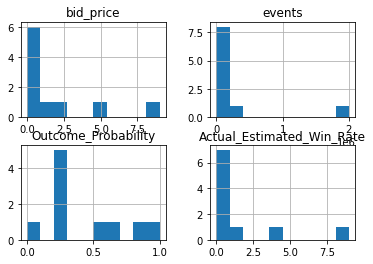

In [7]:
fig, axes = plt.subplots(2, 2)
finaldata_w.hist('bid_price',ax=axes[0][0])
finaldata_w.hist('events',  ax=axes[0][1])
finaldata_w.hist('Outcome_Probability',ax=axes[1][0])
finaldata_w.hist('Actual_Estimated_Win_Rate',ax=axes[1][1])

In [8]:
"""
We check the skeweness of the variables and the data distribution.Skewness of the 
variables are high,will try to reduce the skewness using transformations.
"""
finaldata_w[['bid_price', 'events',
       'Outcome_Probability', 'Actual_Estimated_Win_Rate']].skew()

bid_price                    2.050130
events                       3.042014
Outcome_Probability          0.536117
Actual_Estimated_Win_Rate    2.340442
dtype: float64

In [9]:
"""
Using log transformations,trying to reduce the skeweness in the data for Events, Bid Price
and Estimated win rate and then check the skewenss.Data transformation is to acquire a 
better insight from the data relationship.
"""
finaldata_w['Log_Events'] = np.log(finaldata_w['events']+1) 
finaldata_w['Log_Price'
           ] = np.log(finaldata_w['bid_price']+1) 
finaldata_w['Log_Actual_Estimated_Win_Rate'] = np.log(finaldata_w['Actual_Estimated_Win_Rate']+1)
finaldata_w

/Users/mdp/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mdp/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mdp/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,app,bid_price,win,events,Total_Events_Per_BidPrice,Outcome_Probability,Actual_Estimated_Win_Rate,Log_Events,Log_Price,Log_Actual_Estimated_Win_Rate
1,A,0.01,1,0,100000,0.0,0.000,0.000000,0.009950,0.000000
3,A,0.10,1,3000,10000,0.3,0.030,8.006701,0.095310,0.029559
5,A,0.20,1,2000000,10000000,0.2,0.040,14.508658,0.182322,0.039221
7,A,0.40,1,300000,1000000,0.3,0.120,12.611541,0.336472,0.113329
9,A,0.50,1,20000,100000,0.2,0.100,9.903538,0.405465,0.095310
11,A,0.75,1,3000,10000,0.3,0.225,8.006701,0.559616,0.202941
13,A,1.00,1,600,1000,0.6,0.600,6.398595,0.693147,0.470004
15,A,2.00,1,70,100,0.7,1.400,4.262680,1.098612,0.875469
17,A,5.00,1,8,10,0.8,4.000,2.197225,1.791759,1.609438
19,A,9.00,1,1,1,1.0,9.000,0.693147,2.302585,2.302585


In [10]:
"""
After applying log trasnformation, the skewenees has reduced a lot but still the 
distribution is not symmetrical, reason is less amount of data that we are currently 
working on. More sample would help in this case.
"""
finaldata_w[['Log_Events',
       'Log_Price', 'Log_Actual_Estimated_Win_Rate']].skew()

Log_Events                       0.145031
Log_Price                        1.238411
Log_Actual_Estimated_Win_Rate    1.546646
dtype: float64

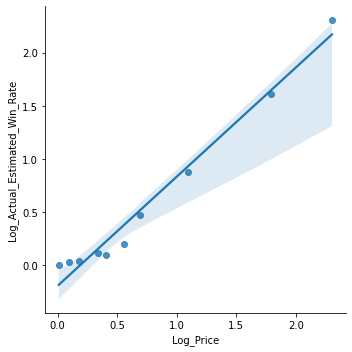

In [11]:
sns.lmplot(x="Log_Price", y="Log_Actual_Estimated_Win_Rate",data=finaldata_w)

Text(0.5, 1.0, 'Bid Price VS Events Distribution(No Transformation)')

<Figure size 432x432 with 0 Axes>

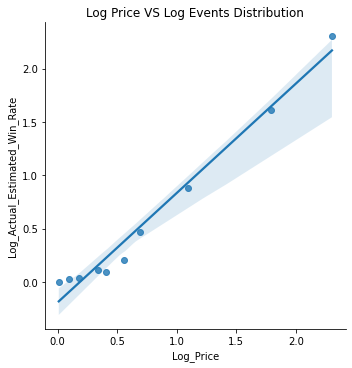

<Figure size 432x432 with 0 Axes>

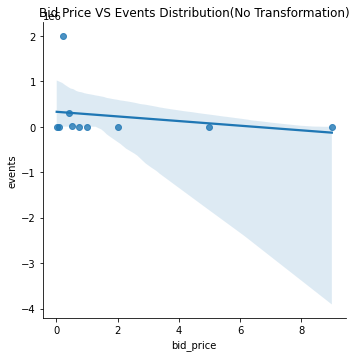

In [12]:
"""
But after applying log transformation, there is little linear relationship between 
Log_events and Log_Bid_Price.
"""
plt.figure(figsize=(6, 6))
sns.lmplot(x="Log_Price", y="Log_Actual_Estimated_Win_Rate",data=finaldata_w)
plt.title('Log Price VS Log Events Distribution')


"""
Below plot indicates no clear relationship between Log_events and Log_Bid_Price.
"""
plt.figure(figsize=(6, 6))
sns.lmplot(x="bid_price", y="events",data=finaldata_w)
plt.title('Bid Price VS Events Distribution(No Transformation)')




Text(0.5, 1.0, 'Log Price VS Probability')

<Figure size 432x432 with 0 Axes>

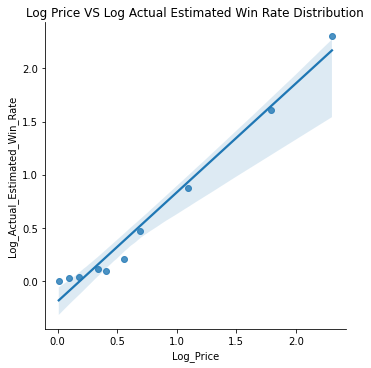

<Figure size 432x432 with 0 Axes>

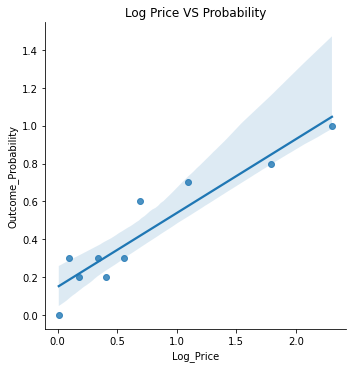

In [13]:
"""
But after applying log transformation, there is a clear pattern of linear relation between 
Log_Actual_Estimated_Win_Rate and Log_Bid_Price.
"""
plt.figure(figsize=(6, 6))
sns.lmplot(x="Log_Price", y="Log_Actual_Estimated_Win_Rate",data=finaldata_w)
plt.title('Log Price VS Log Actual Estimated Win Rate Distribution')

"""
There is some trend between Log Bid Price and Probabilty of the outcome, which makes sense
because higher the bidding price, higher the probabilty of winning.
"""
plt.figure(figsize=(6, 6))
sns.lmplot(x="Log_Price", y="Outcome_Probability",data=finaldata_w)
plt.title('Log Price VS Probability')


#### With the help of regression based statistical model, we will try to estimate the optimal bid price and identify the variables having significant relation with the price using p-value.  The p-value of the the variables Log_Events and Outcome_Probability are higher than the significance level (0.05), which indicates that we fail to reject the null hypothesis and conclude that there is no relationship between the target and predictor. The variable Log_Actual_Estimated_Win_Rate is having a significant relationship with the log bid price, which is seen from the plot and the p-value is < 0.05 form the below model result.


In [14]:
"""
We will drop the app,events and total events per bid price as they are not required for 
building a statistical model.
There are variables which are correlated with target variable.
"""
finaldata_w.drop(['app','win','events','Total_Events_Per_BidPrice','bid_price',
                  'Outcome_Probability', 'Log_Events','Actual_Estimated_Win_Rate'
                 ],axis=1,inplace=True)
finaldata_w.corr()


/Users/mdp/.pyenv/versions/3.6.9/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Log_Price,Log_Actual_Estimated_Win_Rate
Log_Price,1.000000,0.988848
Log_Actual_Estimated_Win_Rate,0.988848,1.000000


In [15]:
x = finaldata_w.drop(['Log_Price'],axis=1)
y = finaldata_w['Log_Price']


In [16]:
"""
The variables are having different scale of values, which could hinder the performance
of the model results and the coefficent would mislead.
"""
sc1= MinMaxScaler(feature_range=(0,1))
scaler_x = pd.DataFrame(sc1.fit_transform(x.values),columns = x.columns)
sc2= MinMaxScaler(feature_range=(0,1))
scaler_y = sc2.fit_transform(y.values.reshape(-1,1))


/Users/mdp/.pyenv/versions/3.6.9/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/mdp/.pyenv/versions/3.6.9/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     352.7
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           6.68e-08
Time:                        21:08:33   Log-Likelihood:                 16.377
No. Observations:                  10   AIC:                            -28.75
Df Residuals:                       8   BIC:                            -28.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

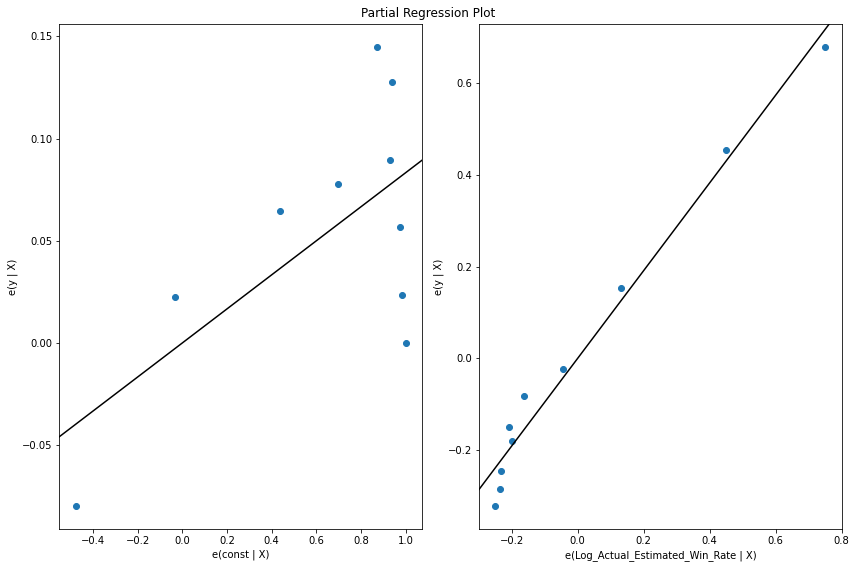

In [17]:

"""
Price increases by 95% when estimated win rate changes by 1%.This variable is statistically
significant with the log of bid price as it has p-value of lower than 5%.
"""
scaler_x = sm.add_constant(scaler_x)
model = sm.OLS(scaler_y,scaler_x).fit()
print(model.summary())

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [19]:
yhat = model.predict(scaler_x)
inv_yhat = sc2.inverse_transform(yhat.values.reshape(-1,1))

final_bidding_data = finaldata_w
final_bidding_data['Estimated_Price'] = inv_yhat
final_bidding_data['Original_Price'] = np.exp(final_bidding_data['Log_Price'])-1
final_bidding_data['Log_Actual_Estimated_Win_Rate'] = np.exp(final_bidding_data['Log_Actual_Estimated_Win_Rate'])-1
final_bidding_data['Ori_Estimated_Price'] = np.exp(final_bidding_data['Estimated_Price'])-1
final_bidding_data['Predicted_Revenue'] = 0.5 - final_bidding_data['Ori_Estimated_Price']
final_bidding_data['Actual_Revenue'] = 0.5 - final_bidding_data['Original_Price']
final_bidding_data



/Users/mdp/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mdp/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mdp/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,Log_Price,Log_Actual_Estimated_Win_Rate,Estimated_Price,Original_Price,Ori_Estimated_Price,Predicted_Revenue,Actual_Revenue
1,0.009950,0.000,0.200985,0.01,0.222607,0.277393,0.49
3,0.095310,0.030,0.229140,0.10,0.257519,0.242481,0.40
5,0.182322,0.040,0.238344,0.20,0.269145,0.230855,0.30
7,0.336472,0.120,0.308932,0.40,0.361970,0.138030,0.10
9,0.405465,0.100,0.291770,0.50,0.338794,0.161206,0.00
11,0.559616,0.225,0.394289,0.75,0.483330,0.016670,-0.25
13,0.693147,0.600,0.648670,1.00,0.912995,-0.412995,-0.50
15,1.098612,1.400,1.034881,2.00,1.814772,-1.314772,-1.50
17,1.791759,4.000,1.733997,5.00,4.663246,-4.163246,-4.50
19,2.302585,9.000,2.394230,9.00,9.959751,-9.459751,-8.50


In [23]:
final_bidding_data.drop(['Log_Price','Estimated_Price'],axis=1,inplace=True)
final_bidding_data.columns = ['Estimated_Win_Rate','Bid_Price','Predicted_Bid_Price',
                      'Predicted_Revenue','Actual_Revenue']

"""
Assuming that the advertiser would pay $0.5 per win, the price that the model has
predicted and based on that predicted price, we compute the new revenue and the
results are below. As we can see from the data below, the bid prices for value above 
$0.5, the predicted revenue is decreasing so, we would like to consider the bod price
below $0.5. Looking at the data from the table below, at bid price $0.4 and $0.5, we see the optimal
predicted price bringing in more revenue.
"""
final_bidding_data




,Estimated_Win_Rate,Bid_Price,Predicted_Bid_Price,Predicted_Revenue,Actual_Revenue
1,0.00,0.01,0.222607,0.277393,0.49
3,0.03,0.10,0.257519,0.242481,0.40
5,0.04,0.20,0.269145,0.230855,0.30
7,0.12,0.40,0.361970,0.138030,0.10
9,0.10,0.50,0.338794,0.161206,0.00
